$\textbf{How can we visualise the TEC distribution in time?}$

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cartopy.crs as ccrs
%matplotlib inline

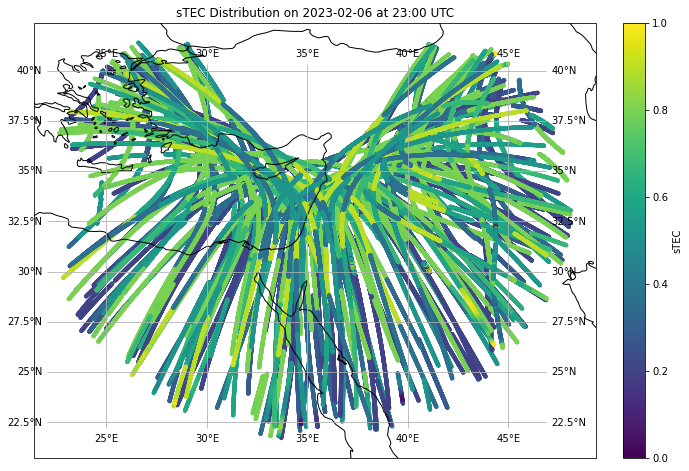

In [2]:
# Load STEC data
df = pd.read_csv('BSHM_230206.csv')
df['UTCTime'] = pd.to_datetime(df['UTCTime'], format='%y%m%d%H%M%S')
df['FormattedTime'] = df['UTCTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
satellite_1 = 'GPS41'

df_gps41 = df[(df['sat'] == 'GPS41') & (df['FormattedTime'] >= '2023-01-01 01:00:00')]


earthquake_date = '2023-02-06'  # Turkey's Earthquake
df_earthquake_day = df[df['UTCTime'].dt.date == pd.to_datetime(earthquake_date).date()]

#Creating a map plot
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(12, 8))
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude') 
ax.coastlines()
ax.gridlines(draw_labels=True)

# Set initial plot title
title = ax.set_title(f'sTEC Distribution on {earthquake_date}')

# Function to update the plot for each frame of the animation
def update(frame):
    df_frame = df_earthquake_day[df_earthquake_day['UTCTime'].dt.hour == frame]
    
    scatter = ax.scatter(df_frame['ipplon'], df_frame['ipplat'], c=df_frame['stec'], cmap='viridis', s=10)
    ax.set_title(f'sTEC Distribution on {earthquake_date} at {frame}:00 UTC')
    return scatter, title


scatter = ax.scatter([], [], c=[], cmap='viridis', s=10)
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('sTEC')

# Create animation
animation = FuncAnimation(fig, update, frames=range(24), interval=500, blit=False)
animation.save('stec_evolution_map.gif', writer='pillow', fps=10)

#animation
plt.show()